In [1]:
import sys
sys.path.append('../..')
from sisyphus2.tasks import rdm as rd
from sisyphus2.backend.models.basic import Basic

from matplotlib import pyplot as plt
%matplotlib inline

/Users/jasminestone/anaconda2/envs/py27tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


define params globally first before passing to RDM, mess w/ model params and explain what can do. (can turn on and off dale's law). some masking, input output connectivity. train_params variables stuff

In [2]:
dt = 10 #time-step
tau = 100 #descent scale TODO(jasmine): check this
T = 2000 #time to run for (number of steps is T/dt)
N_batch = 50 #number of trials TODO(jasmine): verify this
N_rec = 50
name = 'basicModel'

In [3]:
rdm = rd.RDM(dt = dt, tau = tau, T = T, N_batch = N_batch)
gen = rdm.batch_generator()

In [4]:
params = rdm.__dict__
print(params)

{'tau': 100, 'N_in': 2, 'N_batch': 50, 'T': 2000, 'N_steps': 200, 'alpha': 0.1, 'dt': 10, 'N_out': 2}


In [5]:
params['name'] = name
params['N_rec'] = N_rec

In [6]:
basicModel = Basic(params)

In [7]:
basicModel.build()


In [8]:
basicModel.train(gen, {'save_weights_path': '../weights/refactor_weights.npz', 'training_iters': 500})

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Optimization finished!
Model saved in file: ../weights/refactor_weights.npz


([], 12.079277992248535, 21.812472105026245)

In [9]:
x,y,m = gen.next()


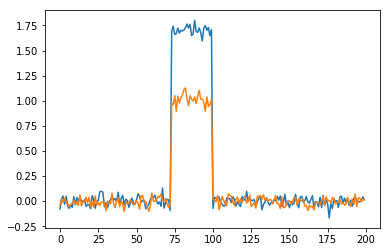

In [10]:
plt.plot(x[0,:,:])

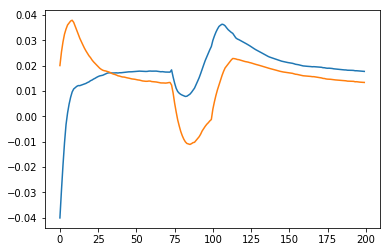

In [11]:
plt.plot(basicModel.test(x)[0][0,:,:])

In [12]:
basicModel.destruct()